# Lead Case study 

In [1]:
# Supressing the Warnings
import warnings
warnings.filterwarnings('ignore')

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

## Reading the data

In [3]:
# reading the data 
lead = pd.read_csv(r'C:\Users\ARUN\Downloads\Maching+learing\Case+study\Lead+Scoring+Case+study\Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Replacing the white space between the column name with '_' so it will be easy to call the columns.
lead.rename(columns={'Prospect ID':'Prospect_ID', 'Lead Number':'Lead_Number', 'Lead Origin':'Lead_Origin', 'Lead Source':'Lead_Source','Do Not Email':'Do_Not_Email', 'Do Not Call':'Do_Not_Call','Total Time Spent on Website':'Total_Time_Spent_on_Website', 'Page Views Per Visit':'Page_Views_Per_Visit', 'Last Activity':'Last_Activity','How did you hear about X Education':'How_did_you_hear_about_X_Education','What is your current occupation':'What_is_your_current_occupation','What matters most to you in choosing a course':'What_matters_most_to_you_in_choosing_a_course','Newspaper Article':'Newspaper_Article', 'X Education Forums':'X_Education_Forums','Digital Advertisement':'Digital_Advertisement', 'Through Recommendations':'Through_Recommendations','Receive More Updates About Our Courses':'Receive_More_Updates_About_Our_Courses', 'Lead Quality': 'Lead_Quality','Update me on Supply Chain Content':'Update_me_on_Supply_Chain_Content', 'Get updates on DM Content':'Get_updates_on_DM_Content','Lead Profile':'Lead_Profile','Asymmetrique Activity Index':'Asymmetrique_Activity_Index','Asymmetrique Profile Index':'Asymmetrique_Profile_Index','Asymmetrique Activity Score':'Asymmetrique_Activity_Score','Asymmetrique Profile Score':'Asymmetrique_Profile_Score','I agree to pay the amount through cheque':'I_agree_to_pay_the_amount_through_cheque','A free copy of Mastering The Interview':'A_free_copy_of_Mastering_The_Interview', 'Last Notable Activity':'Last_Notable_Activity'}, inplace=True)

## Performing EDA

In [5]:
# checking the data type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect_ID                                    9240 non-null   object 
 1   Lead_Number                                    9240 non-null   int64  
 2   Lead_Origin                                    9240 non-null   object 
 3   Lead_Source                                    9204 non-null   object 
 4   Do_Not_Email                                   9240 non-null   object 
 5   Do_Not_Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total_Time_Spent_on_Website                    9240 non-null   int64  
 9   Page_Views_Per_Visit                           9103 

In [6]:
# checking the dimensions of the dataframe before cleaning the data
lead.shape

(9240, 37)

### Data cleaning

In [7]:
# Handling “Select” which is present in many of the categorical variables.
# replacing select by NaN
lead = lead.replace('Select', np.nan)

In [8]:
#checking the missing values
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How_did_you_hear_about_X_Education               78.46
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper_

In [9]:
# Dropping the score variables that are not required 
lead.drop(['Tags','Lead_Quality','Lead_Profile','Asymmetrique_Activity_Index','Asymmetrique_Profile_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Score'],axis=1,inplace=True)

In [10]:
# Dropping the columns with high missing values 
lead.drop(['How_did_you_hear_about_X_Education'],axis=1,inplace=True)

In [11]:
# sum of misisng values in each row
lead.isnull().sum(axis=1)

0       3
1       2
2       0
3       0
4       1
       ..
9235    0
9236    0
9237    0
9238    2
9239    0
Length: 9240, dtype: int64

In [12]:
# count the number of rows having > 5 missing values
len(lead[lead.isnull().sum(axis=1) > 5].index)

49

In [13]:
#retaining the rows having <= 5 NaNs
lead = lead[lead.isnull().sum(axis=1) <= 5]

In [14]:
# look at the missing values again
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect_ID                                       0.00
Lead_Number                                       0.00
Lead_Origin                                       0.00
Lead_Source                                       0.33
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.96
Total_Time_Spent_on_Website                       0.00
Page_Views_Per_Visit                              0.96
Last_Activity                                     0.71
Country                                          26.24
Specialization                                   36.24
What_is_your_current_occupation                  29.19
What_matters_most_to_you_in_choosing_a_course    29.40
Search                                            0.00
Magazine                                          0.00
Newspaper_Article                                 0.00
X_Educatio

#### checking value count of all categorical column

In [15]:
# printing count of categories
print(round((lead['Lead_Origin'].value_counts()/lead['Lead_Origin'].count())*100),2)
print(round((lead['Lead_Source'].value_counts()/lead['Lead_Source'].count())*100),2)
print(round((lead['Do_Not_Email'].value_counts()/lead['Do_Not_Email'].count())*100),2)
print(round((lead['Do_Not_Call'].value_counts()/lead['Do_Not_Call'].count())*100),2)
print(round((lead['Last_Activity'].value_counts()/lead['Last_Activity'].count())*100),2)
print(round((lead['Country'].value_counts()/lead['Country'].count())*100),2)

Landing Page Submission    53.0
API                        39.0
Lead Add Form               7.0
Lead Import                 1.0
Quick Add Form              0.0
Name: Lead_Origin, dtype: float64 2
Google               31.0
Direct Traffic       28.0
Olark Chat           19.0
Organic Search       13.0
Reference             6.0
Welingak Website      1.0
Referral Sites        1.0
Facebook              1.0
bing                  0.0
google                0.0
Click2call            0.0
Live Chat             0.0
Press_Release         0.0
Social Media          0.0
WeLearn               0.0
welearnblog_Home      0.0
testone               0.0
Pay per Click Ads     0.0
blog                  0.0
NC_EDM                0.0
youtubechannel        0.0
Name: Lead_Source, dtype: float64 2
No     92.0
Yes     8.0
Name: Do_Not_Email, dtype: float64 2
No     100.0
Yes      0.0
Name: Do_Not_Call, dtype: float64 2
Email Opened                    38.0
SMS Sent                        30.0
Olark Chat Conversation  

In [16]:
# printing count of categories
print(round((lead['What_is_your_current_occupation'].value_counts()/lead['What_is_your_current_occupation'].count())*100),2)
print(round((lead['What_matters_most_to_you_in_choosing_a_course'].value_counts()/lead['What_matters_most_to_you_in_choosing_a_course'].count())*100),2)
print(round((lead['Search'].value_counts()/lead['Search'].count())*100),2)
print(round((lead['Magazine'].value_counts()/lead['Magazine'].count())*100),2)

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What_is_your_current_occupation, dtype: float64 2
Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What_matters_most_to_you_in_choosing_a_course, dtype: float64 2
No     100.0
Yes      0.0
Name: Search, dtype: float64 2
No    100.0
Name: Magazine, dtype: float64 2


In [17]:
# printing count of categories
print(round((lead['Newspaper_Article'].value_counts()/lead['Newspaper_Article'].count())*100),2)
print(round((lead['X_Education_Forums'].value_counts()/lead['X_Education_Forums'].count())*100),2)
print(round((lead['Newspaper'].value_counts()/lead['Newspaper'].count())*100),2)
print(round((lead['Digital_Advertisement'].value_counts()/lead['Digital_Advertisement'].count())*100),2)
print(round((lead['Through_Recommendations'].value_counts()/lead['Through_Recommendations'].count())*100),2)

No     100.0
Yes      0.0
Name: Newspaper_Article, dtype: float64 2
No     100.0
Yes      0.0
Name: X_Education_Forums, dtype: float64 2
No     100.0
Yes      0.0
Name: Newspaper, dtype: float64 2
No     100.0
Yes      0.0
Name: Digital_Advertisement, dtype: float64 2
No     100.0
Yes      0.0
Name: Through_Recommendations, dtype: float64 2


In [18]:
# printing count of categories
print(round((lead['Receive_More_Updates_About_Our_Courses'].value_counts()/lead['Receive_More_Updates_About_Our_Courses'].count())*100),2)
print(round((lead['Update_me_on_Supply_Chain_Content'].value_counts()/lead['Update_me_on_Supply_Chain_Content'].count())*100),2)
print(round((lead['Get_updates_on_DM_Content'].value_counts()/lead['Get_updates_on_DM_Content'].count())*100),2)
print(round((lead['City'].value_counts()/lead['City'].count())*100),2)
print(round((lead['I_agree_to_pay_the_amount_through_cheque'].value_counts()/lead['I_agree_to_pay_the_amount_through_cheque'].count())*100),2)
print(round((lead['A_free_copy_of_Mastering_The_Interview'].value_counts()/lead['A_free_copy_of_Mastering_The_Interview'].count())*100),2)
print(round((lead['Last_Notable_Activity'].value_counts()/lead['Last_Notable_Activity'].count())*100),2)

No    100.0
Name: Receive_More_Updates_About_Our_Courses, dtype: float64 2
No    100.0
Name: Update_me_on_Supply_Chain_Content, dtype: float64 2
No    100.0
Name: Get_updates_on_DM_Content, dtype: float64 2
Mumbai                         58.0
Thane & Outskirts              14.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64 2
No    100.0
Name: I_agree_to_pay_the_amount_through_cheque, dtype: float64 2
No     69.0
Yes    31.0
Name: A_free_copy_of_Mastering_The_Interview, dtype: float64 2
Modified                        37.0
Email Opened                    31.0
SMS Sent                        24.0
Page Visited on Website          3.0
Olark Chat Conversation          2.0
Email Link Clicked               2.0
Email Bounced                    1.0
Unsubscribed                     1.0
Unreachable                      0.0
Had a Phone Conversation         0.0
Email Marked S

In [19]:
lead.shape

(9191, 29)

In [20]:
# Dropping the Highly skewed columns(i,e NO=100%) which are not required 
lead.drop(['What_matters_most_to_you_in_choosing_a_course','Do_Not_Email','Do_Not_Call','Country','What_matters_most_to_you_in_choosing_a_course','Search','Magazine','X_Education_Forums','Newspaper','Digital_Advertisement','Newspaper_Article','Through_Recommendations','Receive_More_Updates_About_Our_Courses','Update_me_on_Supply_Chain_Content','Get_updates_on_DM_Content','I_agree_to_pay_the_amount_through_cheque'],axis=1,inplace=True)

In [21]:
lead.shape

(9191, 14)

In [22]:
# again checking for missing value
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect_ID                                0.00
Lead_Number                                0.00
Lead_Origin                                0.00
Lead_Source                                0.33
Converted                                  0.00
TotalVisits                                0.96
Total_Time_Spent_on_Website                0.00
Page_Views_Per_Visit                       0.96
Last_Activity                              0.71
Specialization                            36.24
What_is_your_current_occupation           29.19
City                                      39.45
A_free_copy_of_Mastering_The_Interview     0.00
Last_Notable_Activity                      0.00
dtype: float64

In [23]:
# For the catogorical variable column we are imputing 'mode' for missing value 
Mode_Category_1 = lead['City'].mode()[0]
Mode_Category_2 = lead['What_is_your_current_occupation'].mode()[0]
Mode_Category_3 = lead['Specialization'].mode()[0]
Mode_Category_4 = lead['Last_Activity'].mode()[0]
Mode_Category_5 = lead['Lead_Source'].mode()[0]

In [24]:
# Adding the mode value inplace of missing value 
lead['City'].fillna(Mode_Category_1,inplace=True)
lead['What_is_your_current_occupation'].fillna(Mode_Category_2,inplace=True)
lead['Specialization'].fillna(Mode_Category_3,inplace=True)
lead['Last_Activity'].fillna(Mode_Category_4,inplace=True)
lead['Lead_Source'].fillna(Mode_Category_5,inplace=True)

In [25]:
# For numerical variable column we are imputing either 'Mean' or 'Median' of that column
print(lead['TotalVisits'].mean())
print(lead['Page_Views_Per_Visit'].mean())
print(lead['TotalVisits'].median())
print(lead['Page_Views_Per_Visit'].median())

3.445237833681204
2.3628199494672093
3.0
2.0


In [26]:
# Imputing mean for the missing values in numerical column
lead['TotalVisits'] = lead['TotalVisits'].fillna(lead['TotalVisits'].mean())
lead['Page_Views_Per_Visit'] = lead['Page_Views_Per_Visit'].fillna(lead['Page_Views_Per_Visit'].mean())

In [27]:
# Final check for missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect_ID                               0.0
Lead_Number                               0.0
Lead_Origin                               0.0
Lead_Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total_Time_Spent_on_Website               0.0
Page_Views_Per_Visit                      0.0
Last_Activity                             0.0
Specialization                            0.0
What_is_your_current_occupation           0.0
City                                      0.0
A_free_copy_of_Mastering_The_Interview    0.0
Last_Notable_Activity                     0.0
dtype: float64

### Identifiing the categorical columns which are having less row count  and combining these categories and naming it to  'Other'

In [28]:
lead['Last_Notable_Activity'].value_counts()

Modified                        3358
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Name: Last_Notable_Activity, dtype: int64

In [29]:
# combining less row  categories and naming it to  'Other'
n = lead['Last_Notable_Activity'].value_counts().index[:6]
lead['Last_Notable_Activity'] = np.where(lead['Last_Notable_Activity'].isin(n), lead['Last_Notable_Activity'], 'OTHER')

In [30]:
lead['Last_Notable_Activity'].value_counts()

Modified                   3358
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
OTHER                       160
Name: Last_Notable_Activity, dtype: int64

In [31]:
lead['What_is_your_current_occupation'].value_counts()

Unemployed              8242
Working Professional     705
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What_is_your_current_occupation, dtype: int64

In [32]:
# combining less row count categories and naming it to  'Other'
n = lead['What_is_your_current_occupation'].value_counts().index[:3]
lead['What_is_your_current_occupation'] = np.where(lead['What_is_your_current_occupation'].isin(n), lead['What_is_your_current_occupation'], 'OTHER')

In [33]:
lead['What_is_your_current_occupation'].value_counts()

Unemployed              8242
Working Professional     705
Student                  210
OTHER                     34
Name: What_is_your_current_occupation, dtype: int64

In [34]:
lead['Last_Activity'].value_counts()

Email Opened                    3502
SMS Sent                        2739
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    322
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last_Activity, dtype: int64

In [35]:
# combining less row count categories and naming it to  'Other'
n = lead['Last_Activity'].value_counts().index[:8]
lead['Last_Activity'] = np.where(lead['Last_Activity'].isin(n), lead['Last_Activity'], 'OTHER')

In [36]:
lead['Last_Activity'].value_counts()

Email Opened                 3502
SMS Sent                     2739
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 322
Email Link Clicked            267
OTHER                         205
Form Submitted on Website     116
Name: Last_Activity, dtype: int64

In [37]:
lead['Lead_Source'].value_counts()

Google               2898
Direct Traffic       2543
Olark Chat           1754
Organic Search       1154
Reference             510
Welingak Website      130
Referral Sites        125
Facebook               49
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
WeLearn                 1
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
youtubechannel          1
Name: Lead_Source, dtype: int64

In [38]:
# combining less row count categories and naming it to  'Other'
n = lead['Lead_Source'].value_counts().index[:8]
lead['Lead_Source'] = np.where(lead['Lead_Source'].isin(n), lead['Lead_Source'], 'OTHER')

In [39]:
lead['Lead_Source'].value_counts()

Google              2898
Direct Traffic      2543
Olark Chat          1754
Organic Search      1154
Reference            510
Welingak Website     130
Referral Sites       125
Facebook              49
OTHER                 28
Name: Lead_Source, dtype: int64

In [40]:
# checking the dimensions of the dataframe after cleaning the data
lead.shape

(9191, 14)

In [41]:
#checking the percentage of rows retained after data cleaning process
print(round(100*(len(lead.index)/9240)),"%")

99 %


#### We are retained with 99% of rows after data  cleaning process

## Data Preparation

In [42]:
lead.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,What_is_your_current_occupation,City,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,OTHER,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Mumbai,No,Modified


### Dummifying Variables

In [43]:
# Creating a dummy variable for all the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[[ 'Lead_Origin','Lead_Source','Last_Activity', 'Specialization', 'What_is_your_current_occupation','City', 'A_free_copy_of_Mastering_The_Interview','Last_Notable_Activity']], drop_first=True)
lead1 = lead.copy()
# Adding the dummy results to the dataframe
lead1 = pd.concat([lead1, dummy1], axis=1)

In [44]:
lead1.head()

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Specialization,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A_free_copy_of_Mastering_The_Interview_Yes,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_OTHER,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,1,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,OTHER,Media and Advertising,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,...,0,0,0,0,0,1,0,0,0,0


In [45]:
lead1.shape

(9191, 66)

#### Dropping the repeated variables

In [46]:
# We have created dummies for the below variables, so we are dropping them
lead1.drop([ 'Lead_Origin','Lead_Source','Last_Activity', 'Specialization', 'What_is_your_current_occupation','City', 'A_free_copy_of_Mastering_The_Interview','Last_Notable_Activity'],axis=1,inplace=True)

In [47]:
lead1.shape

(9191, 58)

In [48]:
# making sure that we have all variables as numeric.
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9191 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect_ID                                           9191 non-null   object 
 1   Lead_Number                                           9191 non-null   int64  
 2   Converted                                             9191 non-null   int64  
 3   TotalVisits                                           9191 non-null   float64
 4   Total_Time_Spent_on_Website                           9191 non-null   int64  
 5   Page_Views_Per_Visit                                  9191 non-null   float64
 6   Lead_Origin_Landing Page Submission                   9191 non-null   uint8  
 7   Lead_Origin_Lead Add Form                             9191 non-null   uint8  
 8   Lead_Origin_Lead Import                               9191

### Checking for Outliers

In [49]:
# Checking for outliers in the continuous variables
num_lead1 = lead1[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']]

In [50]:
# Checking outliers at 25%, 50%, 75%, 90%, 95%, 96%, 97%, 98% and 99%
num_lead1.describe(percentiles=[.25, .5, .75, .90, .95,.96,.97,.98, .99])

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9191.000000,9191.000000,9191.000000
mean,3.445238,484.886846,2.362820
std,4.831553,546.586262,2.151044
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,247.000000,2.000000
75%,5.000000,930.000000,3.000000
90%,7.000000,1376.000000,5.000000
95%,10.000000,1558.500000,6.000000
96%,10.000000,1603.000000,6.000000


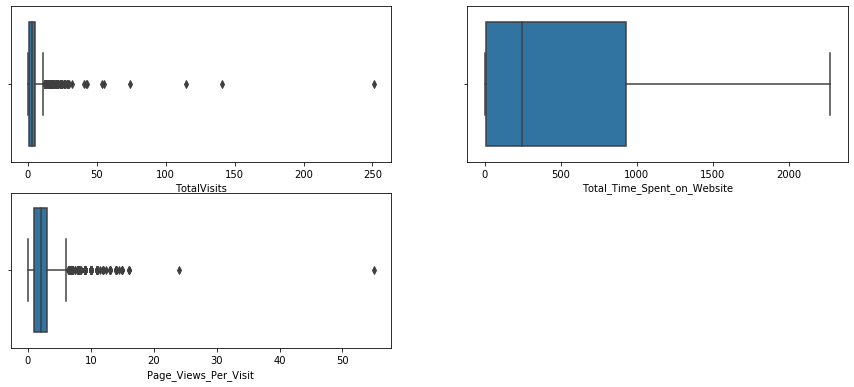

In [51]:
# plotting boxplot graph to find outliers 
plt.figure(figsize = (15,20))
features = lead1.columns[3:6]
for i in enumerate(features):
    plt.subplot(6,2,i[0]+1)
    sns.boxplot(lead1[i[1]])

In [52]:
# capping the outliers 
q4t = lead1['TotalVisits'].quantile(0.97)
q4p = lead1['Page_Views_Per_Visit'].quantile(0.95)

lead1['TotalVisits'][lead1['TotalVisits']>=q4t] = q4t
lead1['Page_Views_Per_Visit'][lead1['Page_Views_Per_Visit']>=q4p] = q4p

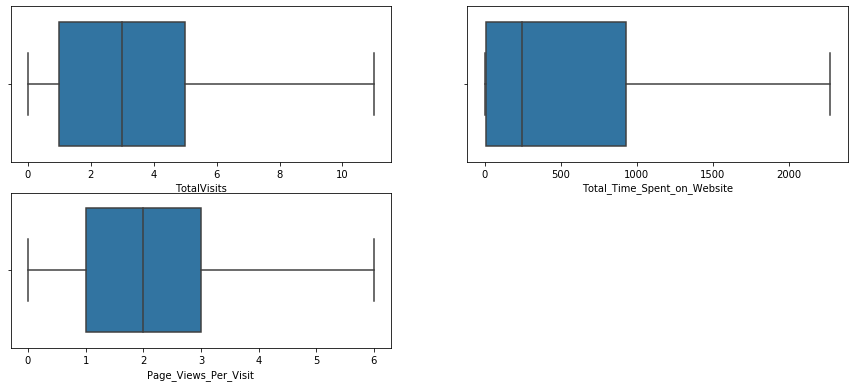

In [53]:
# Replotting box plot after outlier treatment 
plt.figure(figsize = (15,20))
features = lead1.columns[3:6]
for i in enumerate(features):
    plt.subplot(6,2,i[0]+1)
    sns.boxplot(lead1[i[1]])

## Test-Train Spliting 

### Dividing into X and Y sets for the model building

In [54]:
# Putting feature variable to X
X = lead1.drop(['Prospect_ID', 'Lead_Number', 'Converted'], axis=1)

X.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_OTHER,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A_free_copy_of_Mastering_The_Interview_Yes,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_OTHER,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
# Putting response variable to y
y = lead1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the numerical data

In [57]:
# scaling of numerical variable in train set
scaler = StandardScaler()

X_train[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']])

X_train.head()

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Origin_Quick Add Form,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_OTHER,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A_free_copy_of_Mastering_The_Interview_Yes,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_OTHER,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
8331,-0.771479,-0.606883,-0.700063,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
510,-0.421327,-0.754107,-0.700063,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3570,0.629132,1.012589,1.549274,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2837,0.629132,-0.434212,1.549274,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1854,-0.771479,-0.457840,-0.700063,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
### Checking the converted Rate
converted = (sum(lead1['Converted'])/len(lead1['Converted'].index))*100
converted

38.34185616363834

#### We have almost 38% converted rate

 ###  Looking at Correlations

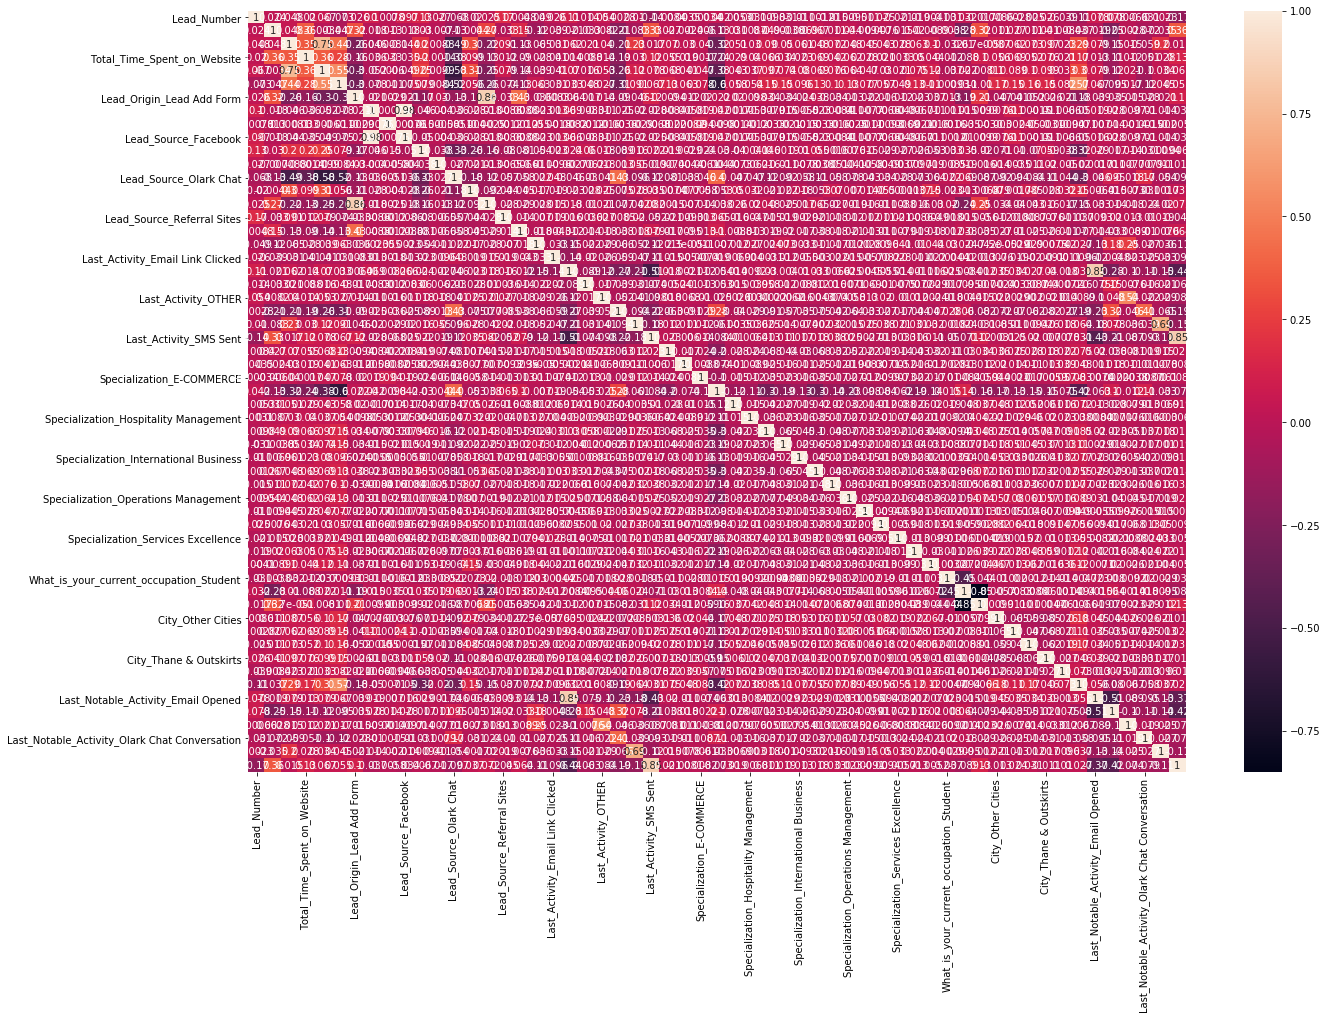

In [59]:
# Let's see the correlation matrix 
     
sns.heatmap(lead1.corr(),annot = True)
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 3.5) 
plt.show()

## Model Building

In [60]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6378
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.4
Date:                Mon, 14 Sep 2020   Deviance:                       5340.8
Time:                        15:59:48   Pearson chi2:                 7.20e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2737      0.754     -1.689      0.091      -2.752       0.204
TotalVisits                                              0.3169      0.054      5.841      0.000       0.211       0.423
Total_Time_Spent_on_Website                              1.0936      0.040     27.255      0.000       1.015       1.172
Page_Views_Per_Visit                                    -0.3238      0.061     -5.336      0.000      -0.443      -0.205
Lead_Origin_Landing Page Submission                     -0.4019      0.118     -3.409      0.001      -0.633      -0.171
Lead_Origin_Lead Add Form                                3.3714      0.780      4.321      0.000       1.842       4.901
Lead_Origin_Lead Import                                  1.3938      1.500      0.929      0.353      -1.546       4.334
Lead_Origin_Quick Add Form                            2.831e-16   3.31e-15      0.086      0.932    -6.2e-15    6.77e-15
Lead_Source_Facebook                                    -0.7640      1.502     -0.509      0.611      -3.708       2.180
Lead_Source_Google                                       0.3729      0.113      3.302      0.001       0.152       0.594
Lead_Source_OTHER                                        0.5800      0.698      0.831      0.406      -0.789       1.949
Lead_Source_Olark Chat                                   1.1453      0.163      7.025      0.000       0.826       1.465
Lead_Source_Organic Search                               0.2104      0.132      1.595      0.111      -0.048       0.469
Lead_Source_Reference                                    0.1398      0.806      0.173      0.862      -1.439       1.719
Lead_Source_Referral Sites                               0.0149      0.343      0.043      0.965      -0.658       0.688
Lead_Source_Welingak Website                             3.0029      1.281      2.344      0.019       0.492       5.514
Last_Activity_Email Bounced                             -1.3094      0.410     -3.197      0.001      -2.112      -0.507
Last_Activity_Email Link Clicked                         0.8322      0.384      2.166      0.030       0.079       1.585
Last_Activity_Email Opened                               1.0973      0.247      4.434      0.000       0.612       1.582
Last_Activity_Form Submitted on Website                  0.7122      0.379      1.881      0.060      -0.030       1.454
Last_Activity_OTHER                                      0.8909      0.366      2.436      0.015       0.174       1.608
Last_Activity_Olark Chat Conversation                   -0.3237      0.277     -1.169      0.242      -0.866       0.219
Last_Activity_Page Visited on Website                    0

In [61]:
# running RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [62]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 11),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 6),
 ('Lead_Origin_Quick Add Form', False, 36),
 ('Lead_Source_Facebook', False, 29),
 ('Lead_Source_Google', False, 9),
 ('Lead_Source_OTHER', False, 7),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 17),
 ('Lead_Source_Reference', False, 8),
 ('Lead_Source_Referral Sites', False, 34),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Link Clicked', True, 1),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_Activity_Form Submitted on Website', True, 1),
 ('Last_Activity_OTHER', True, 1),
 ('Last_Activity_Olark Chat Conversation', False, 3),
 ('Last_Activity_Page Visited on Website', True, 1),
 ('Last_Activity_SMS Sent', True, 1),
 ('Specialization_Business Admi

In [64]:
col = X_train.columns[rfe.support_]

In [65]:
# 20 selected column by RFE method 
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page_Views_Per_Visit', 'Lead_Origin_Lead Import',
       'Lead_Origin_Quick Add Form', 'Lead_Source_Facebook',
       'Lead_Source_Google', 'Lead_Source_OTHER', 'Lead_Source_Organic Search',
       'Lead_Source_Reference', 'Lead_Source_Referral Sites',
       'Last_Activity_Olark Chat Conversation',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What_is_your_current_occupation_Student', 'City_Other Cities',
       'City_Other Citi

### Assessing the model with StatsModels

In [66]:
# Runnung 1st test model
X_train_rfe= X_train[col]
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6412
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2713.9
Date:                Mon, 14 Sep 2020   Deviance:                       5427.9
Time:                        15:59:53   Pearson chi2:                 7.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5108      0.266     -5.679      0.000      -2.032      -0.989
Total_Time_Spent_on_Website                              1.0895      0.039     27.665      0.000       1.012       1.167
Lead_Origin_Landing Page Submission                     -0.6025      0.103     -5.863      0.000      -0.804      -0.401
Lead_Origin_Lead Add Form                                3.2337      0.212     15.256      0.000       2.818       3.649
Lead_Source_Olark Chat                                   0.8518      0.116      7.315      0.000       0.624       1.080
Lead_Source_Welingak Website                             2.8476      1.031      2.763      0.006       0.827       4.868
Last_Activity_Email Bounced                             -1.0543      0.371     -2.844      0.004      -1.781      -0.328
Last_Activity_Email Link Clicked                         1.0900      0.226      4.832      0.000       0.648       1.532
Last_Activity_Email Opened                               1.4875      0.134     11.064      0.000       1.224       1.751
Last_Activity_Form Submitted on Website                  0.9759      0.337      2.897      0.004       0.316       1.636
Last_Activity_OTHER                                      1.1002      0.319      3.448      0.001       0.475       1.726
Last_Activity_Page Visited on Website                    0.9407      0.184      5.102      0.000       0.579       1.302
Last_Activity_SMS Sent                                   1.5221      0.179      8.514      0.000       1.172       1.873
Specialization_Finance Management                       -0.4163      0.090     -4.642      0.000      -0.592      -0.241
Specialization_Hospitality Management                   -0.4911      0.325     -1.511      0.131      -1.128       0.146
Specialization_Retail Management                        -0.6584      0.328     -2.004      0.045      -1.302      -0.015
Specialization_Services Excellence                      -1.0891      0.710     -1.535      0.125      -2.480       0.302
What_is_your_current_occupation_Unemployed              -0.6568      0.221     -2.967      0.003      -1.091      -0.223
What_is_your_current_occupation_Working Professional     2.0292      0.288      7.041      0.000       1.464       2.594
Last_Notable_Activity_OTHER                              1.1701      0.351      3.332      0.001       0.482       1.858
Last_Notable_Activity_SMS Sent                           1.3060      0.143      9.140      0.000       1.026       1.586
========================================================================================================================
"""

In [67]:
# dropping the column which has highest P-value (<5%)
col = col.drop('Specialization_Hospitality Management')

In [68]:
# Rerunning the test modle after dropping the column
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6413
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.1
Date:                Mon, 14 Sep 2020   Deviance:                       5430.2
Time:                        15:59:53   Pearson chi2:                 7.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5276      0.266     -5.750      0.000      -2.048      -1.007
Total_Time_Spent_on_Website                              1.0883      0.039     27.652      0.000       1.011       1.165
Lead_Origin_Landing Page Submission                     -0.6021      0.103     -5.859      0.000      -0.804      -0.401
Lead_Origin_Lead Add Form                                3.2311      0.212     15.249      0.000       2.816       3.646
Lead_Source_Olark Chat                                   0.8518      0.116      7.316      0.000       0.624       1.080
Lead_Source_Welingak Website                             2.8493      1.031      2.765      0.006       0.829       4.869
Last_Activity_Email Bounced                             -1.0607      0.370     -2.865      0.004      -1.786      -0.335
Last_Activity_Email Link Clicked                         1.0879      0.226      4.818      0.000       0.645       1.530
Last_Activity_Email Opened                               1.4891      0.134     11.075      0.000       1.226       1.753
Last_Activity_Form Submitted on Website                  0.9829      0.336      2.921      0.003       0.323       1.642
Last_Activity_OTHER                                      1.0946      0.318      3.438      0.001       0.471       1.719
Last_Activity_Page Visited on Website                    0.9467      0.184      5.138      0.000       0.586       1.308
Last_Activity_SMS Sent                                   1.5219      0.179      8.512      0.000       1.171       1.872
Specialization_Finance Management                       -0.4061      0.089     -4.543      0.000      -0.581      -0.231
Specialization_Retail Management                        -0.6479      0.328     -1.974      0.048      -1.291      -0.005
Specialization_Services Excellence                      -1.0759      0.709     -1.518      0.129      -2.465       0.314
What_is_your_current_occupation_Unemployed              -0.6513      0.221     -2.945      0.003      -1.085      -0.218
What_is_your_current_occupation_Working Professional     2.0197      0.288      7.017      0.000       1.456       2.584
Last_Notable_Activity_OTHER                              1.1826      0.351      3.374      0.001       0.496       1.870
Last_Notable_Activity_SMS Sent                           1.3079      0.143      9.154      0.000       1.028       1.588
========================================================================================================================
"""

In [69]:
# dropping the column which has highest P-value (<5%)
col = col.drop('Specialization_Services Excellence')

In [70]:
# Rerunning the test modle after dropping the column
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.4
Date:                Mon, 14 Sep 2020   Deviance:                       5432.7
Time:                        15:59:53   Pearson chi2:                 7.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5289      0.266     -5.755      0.000      -2.050      -1.008
Total_Time_Spent_on_Website                              1.0885      0.039     27.662      0.000       1.011       1.166
Lead_Origin_Landing Page Submission                     -0.6042      0.103     -5.882      0.000      -0.806      -0.403
Lead_Origin_Lead Add Form                                3.2333      0.212     15.260      0.000       2.818       3.649
Lead_Source_Olark Chat                                   0.8525      0.116      7.324      0.000       0.624       1.081
Lead_Source_Welingak Website                             2.8479      1.031      2.763      0.006       0.828       4.868
Last_Activity_Email Bounced                             -1.0651      0.370     -2.882      0.004      -1.789      -0.341
Last_Activity_Email Link Clicked                         1.0762      0.226      4.766      0.000       0.634       1.519
Last_Activity_Email Opened                               1.4907      0.134     11.091      0.000       1.227       1.754
Last_Activity_Form Submitted on Website                  0.9872      0.336      2.934      0.003       0.328       1.647
Last_Activity_OTHER                                      1.0966      0.318      3.444      0.001       0.473       1.721
Last_Activity_Page Visited on Website                    0.9446      0.184      5.132      0.000       0.584       1.305
Last_Activity_SMS Sent                                   1.5194      0.179      8.499      0.000       1.169       1.870
Specialization_Finance Management                       -0.4025      0.089     -4.504      0.000      -0.578      -0.227
Specialization_Retail Management                        -0.6425      0.328     -1.958      0.050      -1.286       0.001
What_is_your_current_occupation_Unemployed              -0.6536      0.221     -2.956      0.003      -1.087      -0.220
What_is_your_current_occupation_Working Professional     2.0092      0.287      6.989      0.000       1.446       2.573
Last_Notable_Activity_OTHER                              1.1857      0.350      3.383      0.001       0.499       1.873
Last_Notable_Activity_SMS Sent                           1.3108      0.143      9.171      0.000       1.031       1.591
========================================================================================================================
"""

In [71]:
# dropping the column which has highest P-value (<5%)
col = col.drop('Specialization_Retail Management')

In [72]:
# Rerunning the test model after dropping the column
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6415
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.4
Date:                Mon, 14 Sep 2020   Deviance:                       5436.7
Time:                        15:59:53   Pearson chi2:                 7.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5411      0.265     -5.809      0.000      -2.061      -1.021
Total_Time_Spent_on_Website                              1.0869      0.039     27.647      0.000       1.010       1.164
Lead_Origin_Landing Page Submission                     -0.6047      0.103     -5.889      0.000      -0.806      -0.403
Lead_Origin_Lead Add Form                                3.2367      0.212     15.277      0.000       2.821       3.652
Lead_Source_Olark Chat                                   0.8508      0.116      7.311      0.000       0.623       1.079
Lead_Source_Welingak Website                             2.8448      1.031      2.760      0.006       0.825       4.865
Last_Activity_Email Bounced                             -1.0665      0.371     -2.879      0.004      -1.793      -0.340
Last_Activity_Email Link Clicked                         1.0784      0.226      4.779      0.000       0.636       1.521
Last_Activity_Email Opened                               1.4917      0.134     11.102      0.000       1.228       1.755
Last_Activity_Form Submitted on Website                  0.9860      0.336      2.934      0.003       0.327       1.645
Last_Activity_OTHER                                      1.1100      0.318      3.488      0.000       0.486       1.734
Last_Activity_Page Visited on Website                    0.9464      0.184      5.144      0.000       0.586       1.307
Last_Activity_SMS Sent                                   1.5142      0.179      8.471      0.000       1.164       1.865
Specialization_Finance Management                       -0.3896      0.089     -4.372      0.000      -0.564      -0.215
What_is_your_current_occupation_Unemployed              -0.6535      0.221     -2.960      0.003      -1.086      -0.221
What_is_your_current_occupation_Working Professional     2.0121      0.287      7.007      0.000       1.449       2.575
Last_Notable_Activity_OTHER                              1.1690      0.351      3.335      0.001       0.482       1.856
Last_Notable_Activity_SMS Sent                           1.3135      0.143      9.189      0.000       1.033       1.594
========================================================================================================================
"""

### Model evalution before checking VIF

In [73]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8331    0.007282
510     0.128740
3570    0.978003
2837    0.862063
1854    0.063434
1775    0.157458
7078    0.229797
7854    0.062906
504     0.371151
7317    0.065186
dtype: float64

In [74]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00728213, 0.12873965, 0.97800313, 0.8620627 , 0.06343434,
       0.15745826, 0.22979673, 0.0629064 , 0.37115095, 0.06518573])

#### Creating a dataframe with the actual coverted flag and the predicted probabilities

In [75]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,converted,converted_Prob,ID
0,0,0.007282,8331
1,0,0.128740,510
2,1,0.978003,3570
3,1,0.862063,2837
4,0,0.063434,1854


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [76]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,converted,converted_Prob,ID,predicted
0,0,0.007282,8331,0
1,0,0.128740,510,0
2,1,0.978003,3570,1
3,1,0.862063,2837,1
4,0,0.063434,1854,0


In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3530  452]
 [ 751 1700]]


In [78]:
# Predicted        not_converted    converted
# Actual
# not_converted        3530          452
# converted            751           1700  

In [79]:
# checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.8129954919944039


### Checking the VIF

In [80]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What_is_your_current_occupation_Unemployed,10.93
11,Last_Activity_SMS Sent,6.90
16,Last_Notable_Activity_SMS Sent,4.76
1,Lead_Origin_Landing Page Submission,4.39
7,Last_Activity_Email Opened,3.48
12,Specialization_Finance Management,2.98
3,Lead_Source_Olark Chat,2.07
14,What_is_your_current_occupation_Working Profes...,1.89
2,Lead_Origin_Lead Add Form,1.78
9,Last_Activity_OTHER,1.68


In [81]:
#Dropping the column which is having high VIF value
col = col.drop('What_is_your_current_occupation_Unemployed')

In [82]:
# Rerunning the test modle after dropping the column
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6416
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.6
Date:                Mon, 14 Sep 2020   Deviance:                       5445.2
Time:                        15:59:54   Pearson chi2:                 7.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1758      0.158    -13.789      0.000      -2.485      -1.867
Total_Time_Spent_on_Website                              1.0868      0.039     27.673      0.000       1.010       1.164
Lead_Origin_Landing Page Submission                     -0.6010      0.103     -5.861      0.000      -0.802      -0.400
Lead_Origin_Lead Add Form                                3.2623      0.212     15.420      0.000       2.848       3.677
Lead_Source_Olark Chat                                   0.8592      0.116      7.393      0.000       0.631       1.087
Lead_Source_Welingak Website                             2.8104      1.031      2.727      0.006       0.791       4.830
Last_Activity_Email Bounced                             -1.0675      0.372     -2.873      0.004      -1.796      -0.339
Last_Activity_Email Link Clicked                         1.0739      0.226      4.760      0.000       0.632       1.516
Last_Activity_Email Opened                               1.4892      0.134     11.086      0.000       1.226       1.752
Last_Activity_Form Submitted on Website                  0.9742      0.336      2.895      0.004       0.315       1.634
Last_Activity_OTHER                                      1.0943      0.318      3.436      0.001       0.470       1.719
Last_Activity_Page Visited on Website                    0.9437      0.184      5.133      0.000       0.583       1.304
Last_Activity_SMS Sent                                   1.4985      0.178      8.397      0.000       1.149       1.848
Specialization_Finance Management                       -0.3897      0.089     -4.374      0.000      -0.564      -0.215
What_is_your_current_occupation_Working Professional     2.6485      0.191     13.875      0.000       2.274       3.023
Last_Notable_Activity_OTHER                              1.1617      0.351      3.311      0.001       0.474       1.849
Last_Notable_Activity_SMS Sent                           1.3139      0.143      9.203      0.000       1.034       1.594
========================================================================================================================
"""

In [83]:
# Re-checking the VIF  
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last_Activity_SMS Sent,6.02
15,Last_Notable_Activity_SMS Sent,4.76
1,Lead_Origin_Landing Page Submission,3.05
7,Last_Activity_Email Opened,2.50
12,Specialization_Finance Management,2.14
3,Lead_Source_Olark Chat,1.79
2,Lead_Origin_Lead Add Form,1.71
9,Last_Activity_OTHER,1.62
14,Last_Notable_Activity_OTHER,1.62
10,Last_Activity_Page Visited on Website,1.30


In [84]:
#Dropping the column which is having high VIF value
col = col.drop('Last_Activity_SMS Sent')

In [85]:
# Rerunning the test modle after dropping the column
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6417
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2758.6
Date:                Mon, 14 Sep 2020   Deviance:                       5517.2
Time:                        15:59:55   Pearson chi2:                 7.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5431      0.128    -12.058      0.000      -1.794      -1.292
Total_Time_Spent_on_Website                              1.0954      0.039     27.952      0.000       1.019       1.172
Lead_Origin_Landing Page Submission                     -0.5679      0.102     -5.569      0.000      -0.768      -0.368
Lead_Origin_Lead Add Form                                3.4024      0.213     15.976      0.000       2.985       3.820
Lead_Source_Olark Chat                                   0.7825      0.114      6.848      0.000       0.558       1.006
Lead_Source_Welingak Website                             2.8908      1.031      2.804      0.005       0.870       4.911
Last_Activity_Email Bounced                             -1.7150      0.363     -4.731      0.000      -2.426      -1.005
Last_Activity_Email Link Clicked                         0.4597      0.208      2.207      0.027       0.051       0.868
Last_Activity_Email Opened                               0.8617      0.099      8.728      0.000       0.668       1.055
Last_Activity_Form Submitted on Website                  0.3282      0.324      1.013      0.311      -0.307       0.963
Last_Activity_OTHER                                      0.4487      0.306      1.467      0.142      -0.151       1.048
Last_Activity_Page Visited on Website                    0.2982      0.159      1.873      0.061      -0.014       0.610
Specialization_Finance Management                       -0.4230      0.089     -4.761      0.000      -0.597      -0.249
What_is_your_current_occupation_Working Professional     2.6308      0.189     13.893      0.000       2.260       3.002
Last_Notable_Activity_OTHER                              1.1733      0.352      3.331      0.001       0.483       1.864
Last_Notable_Activity_SMS Sent                           2.1826      0.107     20.319      0.000       1.972       2.393
========================================================================================================================
"""

In [86]:
# dropping the column which has highest P-value (<5%)
col = col.drop('Last_Activity_Form Submitted on Website')

In [87]:
# Rerunning the test modle after dropping the column
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.1
Date:                Mon, 14 Sep 2020   Deviance:                       5518.2
Time:                        15:59:55   Pearson chi2:                 7.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5184      0.125    -12.108      0.000      -1.764      -1.273
Total_Time_Spent_on_Website                              1.0953      0.039     27.949      0.000       1.018       1.172
Lead_Origin_Landing Page Submission                     -0.5689      0.102     -5.575      0.000      -0.769      -0.369
Lead_Origin_Lead Add Form                                3.4023      0.213     15.977      0.000       2.985       3.820
Lead_Source_Olark Chat                                   0.7792      0.114      6.825      0.000       0.555       1.003
Lead_Source_Welingak Website                             2.8844      1.031      2.798      0.005       0.864       4.905
Last_Activity_Email Bounced                             -1.7395      0.362     -4.806      0.000      -2.449      -1.030
Last_Activity_Email Link Clicked                         0.4390      0.207      2.118      0.034       0.033       0.845
Last_Activity_Email Opened                               0.8405      0.096      8.738      0.000       0.652       1.029
Last_Activity_OTHER                                      0.4227      0.305      1.385      0.166      -0.175       1.021
Last_Activity_Page Visited on Website                    0.2761      0.158      1.752      0.080      -0.033       0.585
Specialization_Finance Management                       -0.4282      0.089     -4.824      0.000      -0.602      -0.254
What_is_your_current_occupation_Working Professional     2.6315      0.190     13.881      0.000       2.260       3.003
Last_Notable_Activity_OTHER                              1.1804      0.353      3.346      0.001       0.489       1.872
Last_Notable_Activity_SMS Sent                           2.1612      0.105     20.576      0.000       1.955       2.367
========================================================================================================================
"""

In [88]:
# dropping the column which has highest P-value (<5%)
col = col.drop('Last_Activity_OTHER')

In [89]:
# Rerunning the test modle after dropping the column
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6419
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2760.0
Date:                Mon, 14 Sep 2020   Deviance:                       5520.1
Time:                        15:59:55   Pearson chi2:                 7.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4920      0.124    -12.066      0.000      -1.734      -1.250
Total_Time_Spent_on_Website                              1.0950      0.039     27.951      0.000       1.018       1.172
Lead_Origin_Landing Page Submission                     -0.5641      0.102     -5.533      0.000      -0.764      -0.364
Lead_Origin_Lead Add Form                                3.4079      0.213     16.018      0.000       2.991       3.825
Lead_Source_Olark Chat                                   0.7755      0.114      6.799      0.000       0.552       0.999
Lead_Source_Welingak Website                             2.8618      1.030      2.778      0.005       0.843       4.881
Last_Activity_Email Bounced                             -1.9121      0.346     -5.529      0.000      -2.590      -1.234
Last_Activity_Email Link Clicked                         0.4118      0.206      1.997      0.046       0.008       0.816
Last_Activity_Email Opened                               0.8124      0.094      8.675      0.000       0.629       0.996
Last_Activity_Page Visited on Website                    0.2469      0.156      1.584      0.113      -0.059       0.552
Specialization_Finance Management                       -0.4292      0.089     -4.836      0.000      -0.603      -0.255
What_is_your_current_occupation_Working Professional     2.6330      0.190     13.885      0.000       2.261       3.005
Last_Notable_Activity_OTHER                              1.5096      0.261      5.778      0.000       0.998       2.022
Last_Notable_Activity_SMS Sent                           2.1327      0.103     20.781      0.000       1.932       2.334
========================================================================================================================
"""

In [90]:
# dropping the column which has highest P-value (<5%)
col = col.drop('Last_Activity_Page Visited on Website')

In [91]:
# Rerunning the test modle after dropping the column
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2761.3
Date:                Mon, 14 Sep 2020   Deviance:                       5522.5
Time:                        15:59:55   Pearson chi2:                 7.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4298      0.117    -12.249      0.000      -1.659      -1.201
Total_Time_Spent_on_Website                              1.0963      0.039     27.964      0.000       1.019       1.173
Lead_Origin_Landing Page Submission                     -0.5591      0.102     -5.487      0.000      -0.759      -0.359
Lead_Origin_Lead Add Form                                3.4011      0.212     16.013      0.000       2.985       3.817
Lead_Source_Olark Chat                                   0.7650      0.114      6.726      0.000       0.542       0.988
Lead_Source_Welingak Website                             2.8591      1.030      2.776      0.006       0.840       4.878
Last_Activity_Email Bounced                             -1.9497      0.344     -5.666      0.000      -2.624      -1.275
Last_Activity_Email Link Clicked                         0.3538      0.203      1.745      0.081      -0.043       0.751
Last_Activity_Email Opened                               0.7520      0.085      8.861      0.000       0.586       0.918
Specialization_Finance Management                       -0.4344      0.089     -4.898      0.000      -0.608      -0.261
What_is_your_current_occupation_Working Professional     2.6255      0.189     13.867      0.000       2.254       2.997
Last_Notable_Activity_OTHER                              1.4573      0.259      5.628      0.000       0.950       1.965
Last_Notable_Activity_SMS Sent                           2.0716      0.094     21.932      0.000       1.887       2.257
========================================================================================================================
"""

In [92]:
# dropping the column which has highest P-value (<5%)
col = col.drop('Last_Activity_Email Link Clicked')

In [93]:
# Rerunning the test modle after dropping the column
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6433
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2762.7
Date:                Mon, 14 Sep 2020   Deviance:                       5525.5
Time:                        15:59:55   Pearson chi2:                 7.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3942      0.115    -12.161      0.000      -1.619      -1.170
Total_Time_Spent_on_Website                              1.0954      0.039     27.954      0.000       1.019       1.172
Lead_Origin_Landing Page Submission                     -0.5582      0.102     -5.480      0.000      -0.758      -0.359
Lead_Origin_Lead Add Form                                3.4136      0.212     16.072      0.000       2.997       3.830
Lead_Source_Olark Chat                                   0.7691      0.114      6.763      0.000       0.546       0.992
Lead_Source_Welingak Website                             2.8529      1.030      2.770      0.006       0.834       4.872
Last_Activity_Email Bounced                             -1.9720      0.344     -5.741      0.000      -2.645      -1.299
Last_Activity_Email Opened                               0.7161      0.082      8.739      0.000       0.556       0.877
Specialization_Finance Management                       -0.4374      0.089     -4.931      0.000      -0.611      -0.264
What_is_your_current_occupation_Working Professional     2.6274      0.189     13.883      0.000       2.256       2.998
Last_Notable_Activity_OTHER                              1.4271      0.258      5.526      0.000       0.921       1.933
Last_Notable_Activity_SMS Sent                           2.0358      0.092     22.173      0.000       1.856       2.216
========================================================================================================================
"""

In [94]:
# checking the VIF
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead_Origin_Landing Page Submission,1.90
7,Specialization_Finance Management,1.87
6,Last_Activity_Email Opened,1.84
3,Lead_Source_Olark Chat,1.75
10,Last_Notable_Activity_SMS Sent,1.64
2,Lead_Origin_Lead Add Form,1.58
0,Total_Time_Spent_on_Website,1.28
4,Lead_Source_Welingak Website,1.26
8,What_is_your_current_occupation_Working Profes...,1.21
5,Last_Activity_Email Bounced,1.15


#### All variables have a good value of VIF and P-value.We can proceed with making predictions using this  Final model.

## Train model evaluvation 

In [95]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8331    0.006519
510     0.125486
3570    0.978540
2837    0.857869
1854    0.130592
1775    0.285463
7078    0.210528
7854    0.115283
504     0.583543
7317    0.056589
dtype: float64

In [96]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00651856, 0.12548612, 0.97853957, 0.85786881, 0.13059232,
       0.28546326, 0.21052829, 0.11528261, 0.58354312, 0.05658925])

In [97]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,converted,converted_Prob,ID
0,0,0.006519,8331
1,0,0.125486,510
2,1,0.978540,3570
3,1,0.857869,2837
4,0,0.130592,1854


In [98]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,converted,converted_Prob,ID,predicted
0,0,0.006519,8331,0
1,0,0.125486,510,0
2,1,0.978540,3570,1
3,1,0.857869,2837,1
4,0,0.130592,1854,0


In [99]:
# Checking for confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3572  410]
 [ 858 1593]]


In [100]:
# Predicted        not_converted    converted
# Actual
# not_converted        3572          410
# converted            858           1593 

In [101]:
# checking the overall accuracy again.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.8028913415202861


#### There is no significant change in overall accuracy 

### Finding sensitivity ,specificity 

In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6499388004895961

In [104]:
# Let us calculate specificity
TN / float(TN+FP)

0.8970366649924661

In [105]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10296333500753391


In [106]:
# positive predictive value 
print (TP / float(TP+FP))

0.7953070394408387


In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8063205417607223


### Plotting the ROC Curve

In [108]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_Prob, drop_intermediate = False )

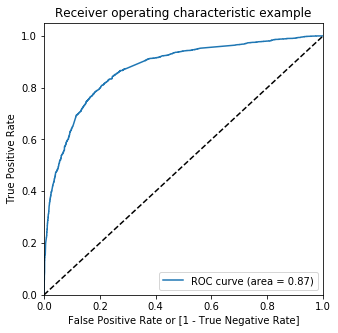

In [110]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

### Since the curve is towards the upper-left corner and the area under the curve (AUC) is more so we have a better  model.

### Finding Optimal Cutoff Point

In [111]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006519,8331,0,1,0,0,0,0,0,0,0,0,0
1,0,0.125486,510,0,1,1,0,0,0,0,0,0,0,0
2,1,0.978540,3570,1,1,1,1,1,1,1,1,1,1,1
3,1,0.857869,2837,1,1,1,1,1,1,1,1,1,1,0
4,0,0.130592,1854,0,1,1,0,0,0,0,0,0,0,0


In [112]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381004  1.000000  0.000000
0.1   0.1  0.531167  0.974296  0.258413
0.2   0.2  0.735893  0.910649  0.628327
0.3   0.3  0.790922  0.833537  0.764691
0.4   0.4  0.808021  0.756426  0.839779
0.5   0.5  0.802891  0.649939  0.897037
0.6   0.6  0.791233  0.575275  0.924159
0.7   0.7  0.776310  0.496940  0.948267
0.8   0.8  0.754081  0.397389  0.973631
0.9   0.9  0.713353  0.266422  0.988448


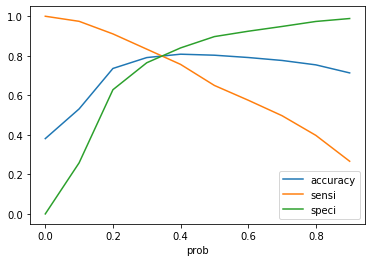

In [113]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [114]:
# using the optimum cutoff point to the final prediction 
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,converted,converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.006519,8331,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.125486,510,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.978540,3570,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.857869,2837,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.130592,1854,0,1,1,0,0,0,0,0,0,0,0,0


In [115]:
#checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7994714752059692

In [116]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3165,  817],
       [ 473, 1978]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# sensitivity of our model
TP / float(TP+FN)

0.8070175438596491

In [119]:
# specificity of our model
TN / float(TN+FP)

0.7948267202410849

In [120]:
# Calculate false postive rate - predicting convertion but the customer does not convert.
print(FP/ float(TN+FP))

0.2051732797589151


In [121]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7076923076923077


In [122]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8699835074216603


## Precision and Recall

In [123]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion

array([[3572,  410],
       [ 858, 1593]], dtype=int64)

##### Precision
TP / TP + FP

In [124]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7953070394408387

##### Recall
TP / TP + FN

In [125]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6499388004895961

#### To check Precision and Recal using sklearn utilities

In [126]:
precision_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7953070394408387

In [127]:
recall_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.6499388004895961

### Precision and recall tradeoff

In [128]:
y_train_pred_final.converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       0
        ..
 6428    1
 6429    0
 6430    1
 6431    1
 6432    0
 Name: converted, Length: 6433, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       0
        ..
 6428    1
 6429    0
 6430    1
 6431    0
 6432    1
 Name: predicted, Length: 6433, dtype: int64)

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

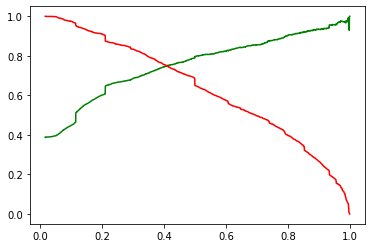

In [130]:
# plotting precision and recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### When comparing the cutoff point of Accuracy, Sensitivity and Specificity(0.34) with cutoff point of precision and recall curve(0.4).  We take the optimal cut-off point for our model 0.34 as we are gettting decent values of all the three variable  Accuracy, Sensitivity and Specificity as ~80%

## Making predictions on the test set

In [131]:
# scalling the test set 
X_test[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']] = scaler.transform(X_test[['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']])

In [132]:
# adding the selected columns from RFE method 
X_test = X_test[col]
X_test.head()

,Total_Time_Spent_on_Website,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Opened,Specialization_Finance Management,What_is_your_current_occupation_Working Professional,Last_Notable_Activity_OTHER,Last_Notable_Activity_SMS Sent
7864,-0.843169,1,0,0,0,0,1,0,0,0,0
8362,0.092889,1,0,0,0,0,1,0,1,0,0
2709,1.676008,1,0,0,0,0,0,0,0,0,1
7622,-0.790459,1,0,0,0,0,0,0,0,0,1
3881,-0.654140,1,0,0,0,0,0,0,1,0,1


In [133]:
# adding constant 
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [134]:
y_test_pred = res.predict(X_test_sm)

In [135]:
y_test_pred[:10]

7864    0.103408
8362    0.816497
2709    0.872047
7622    0.313772
3881    0.880182
1185    0.165512
2526    0.300357
2520    0.058827
5222    0.157346
2295    0.172131
dtype: float64

In [136]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [137]:
# seeing the head
y_pred_1.head()

,0
7864,0.103408
8362,0.816497
2709,0.872047
7622,0.313772
3881,0.880182


In [138]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [139]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [140]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [141]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [142]:
y_pred_final.head()

,Converted,ID,0
0,0,7864,0.103408
1,1,8362,0.816497
2,1,2709,0.872047
3,0,7622,0.313772
4,1,3881,0.880182


In [143]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 :'Converted_Prob'})

In [144]:
# using the optimum cutoff point to the final prediction 
y_pred_final['Final_Prediction'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [145]:
y_pred_final.head()

,Converted,ID,Converted_Prob,Final_Prediction
0,0,7864,0.103408,0
1,1,8362,0.816497,1
2,1,2709,0.872047,1
3,0,7622,0.313772,0
4,1,3881,0.880182,1


In [146]:
# Generating Lead Score variable for the converted probability
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x : round(x * 100) )

In [147]:
# Rearranging the columns
column_titles = ['ID','Converted','Converted_Prob','Final_Prediction','Lead_Score']

y_pred_final.reindex(columns=column_titles)


,ID,Converted,Converted_Prob,Final_Prediction,Lead_Score
0,7864,0,0.103408,0,10
1,8362,1,0.816497,1,82
2,2709,1,0.872047,1,87
3,7622,0,0.313772,0,31
4,3881,1,0.880182,1,88
...,...,...,...,...,...
2753,7910,1,0.494407,1,49
2754,3986,0,0.143787,0,14
2755,4988,0,0.169422,0,17
2756,2733,0,0.115283,0,12


In [148]:
y_pred_final.describe()

,Converted,ID,Converted_Prob,Final_Prediction,Lead_Score
count,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000
mean,0.389050,4631.919144,0.381265,0.432560,38.164249
std,0.487623,2690.512730,0.313561,0.495521,31.327077
min,0.000000,0.000000,0.005348,0.000000,1.000000
25%,0.000000,2295.250000,0.115283,0.000000,12.000000
50%,0.000000,4631.000000,0.227754,0.000000,23.000000
75%,1.000000,6983.500000,0.635828,1.000000,64.000000
max,1.000000,9236.000000,0.999568,1.000000,100.000000


In [149]:
#  checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Prediction)

0.8085569253081943

In [150]:
# checking the confution matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Prediction )
confusion2

array([[1361,  324],
       [ 204,  869]], dtype=int64)

In [151]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.809878844361603

In [153]:
# Let us calculate specificity
TN / float(TN+FP)

0.8077151335311573

### We got Overall Accuracy =80% , Sensitivity = 80% and Specificity =80% 

# Conclusion

### We have  build a model where we have  assigned a lead score to each of the leads so that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.
### We have created the model which has Prediction rate of converting lead in to customer is around 80% and it has Predicting rate non converting lead is around 80% .
### Our final model has an accuracy of 80% of Converting lead into customer.
### We have improved the lead conversion rate from 30% to 80%